In this project, we will build a linear classifier in TensorFlow without utilizing any API such as Keras on linearly separable synthetic data. We will also implement the gradient descent technique.

In [54]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [55]:
#Generating two classes of random points
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal([0, 3], [[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal([3, 0], [[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [56]:
print(negative_samples.shape, positive_samples.shape)

(1000, 2) (1000, 2)


In [57]:
#Stacking the two classes
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [58]:
#Generating the corresponding targets
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype=np.float32),
                    np.ones((num_samples_per_class, 1), dtype=np.float32)))

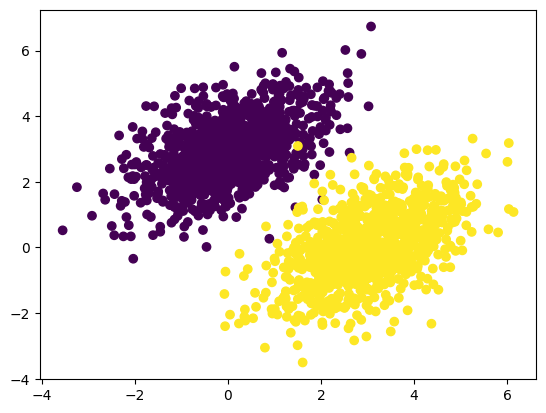

In [59]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)
plt.show()

Let’s create a linear classifier that can learn to separate these two classes:

In [60]:
#establish randomly initialized connection weights and 0-initialized bias
W = tf.Variable(tf.random.uniform(shape=(2, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

In [61]:
#forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

In [62]:
#mean squared error loss function
def square_loss(targets, predictions):
    return tf.reduce_mean(tf.square(targets - predictions))

In [63]:
#The training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W*learning_rate)
    b.assign_sub(grad_loss_wrt_b*learning_rate)
    
    return loss

In [64]:
#the training loop
for step in range(50):
    loss = training_step(inputs, targets)
    print(f"Step {step} loss: {loss:.6f}; parameters: W = {W.numpy().ravel()}, b = {b.numpy().ravel()}")

Step 0 loss: 5.686558; parameters: W = [ 0.13845262 -0.15419161], b = [-0.34103814]
Step 1 loss: 0.773793; parameters: W = [0.40367505 0.10366935], b = [-0.16808142]
Step 2 loss: 0.238181; parameters: W = [ 0.2947893 -0.0035442], b = [-0.18601485]
Step 3 loss: 0.155275; parameters: W = [0.32378978 0.02474316], b = [-0.13579029]
Step 4 loss: 0.134732; parameters: W = [0.3025222  0.00364925], b = [-0.11272842]
Step 5 loss: 0.123507; parameters: W = [0.30026993 0.00124817], b = [-0.08162113]
Step 6 loss: 0.114323; parameters: W = [ 0.291489   -0.00755874], b = [-0.05534483]
Step 7 loss: 0.106121; parameters: W = [ 0.28556606 -0.01354908], b = [-0.02906846]
Step 8 loss: 0.098694; parameters: W = [ 0.27902228 -0.02014144], b = [-0.0044876]
Step 9 loss: 0.091952; parameters: W = [ 0.27311862 -0.02609713], b = [0.01910224]
Step 10 loss: 0.085832; parameters: W = [ 0.2673712  -0.03189198], b = [0.04151776]
Step 11 loss: 0.080276; parameters: W = [ 0.26193982 -0.03736937], b = [0.06289907]
Step

A predicted class of an instance is W[0,0]x + W[1,0]y + b, if it's greater than 0.5, it should be classified in class 1, otherwise in class 0. And the decision boundary is W[0,0]x + W[1,0]y + b = 0.5, which we will plot below.

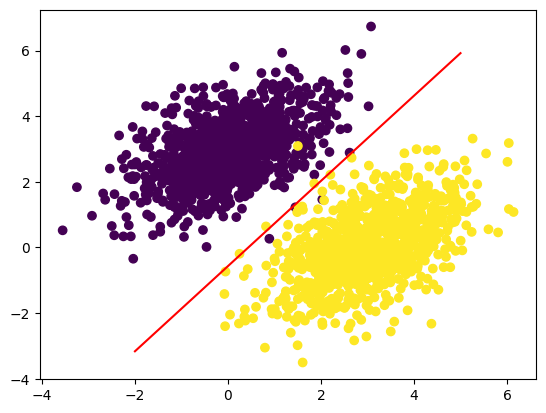

In [78]:
x = np.linspace(-2, 5)
y = (0.5 - b - W[0,0]*x) / W[1,0]
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)
plt.plot(x, y, 'r-')
plt.show()